### LinearRegression(BostonHousePricePrediction) With Cpmplete EDA.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
boston = load_boston()

In [4]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
type(boston)

sklearn.utils.Bunch

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [8]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston.data.shape

(506, 13)

In [11]:
data = boston['data']
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
df = pd.DataFrame(data,columns = boston['feature_names'])

In [13]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
df['Price']= boston.target

In [15]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Understanding Our Data

In [16]:
# df(DataFrame) Generated Through Pandas
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


###  Checking null values

In [18]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Data Visualization

In [20]:
# visualize pair wise relationship and correlation b/w different features
# sns.pairplot(df)


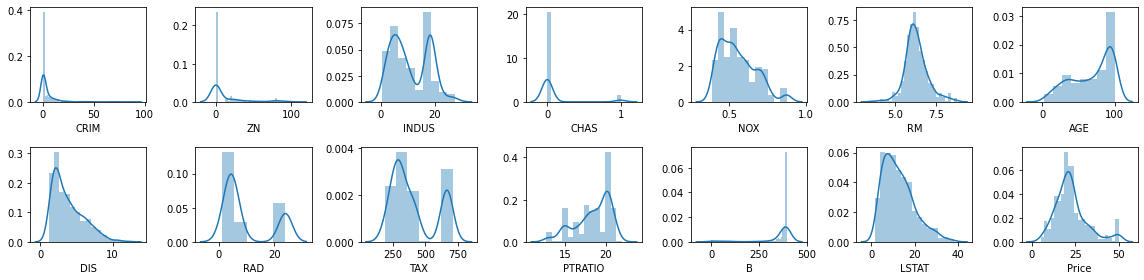

In [21]:
# Creating Distribution graph 
rows =  2
cols = 7
fig, ax = plt.subplots(rows,cols,figsize =(16,4))
col=df.columns
index = 0 
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax = ax[i][j])
        index = index+1
plt.tight_layout()

In [22]:
# Pearson Correlation Cofficient (values b/w -1 to 1)
corr_mat = df.corr()

In [23]:
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


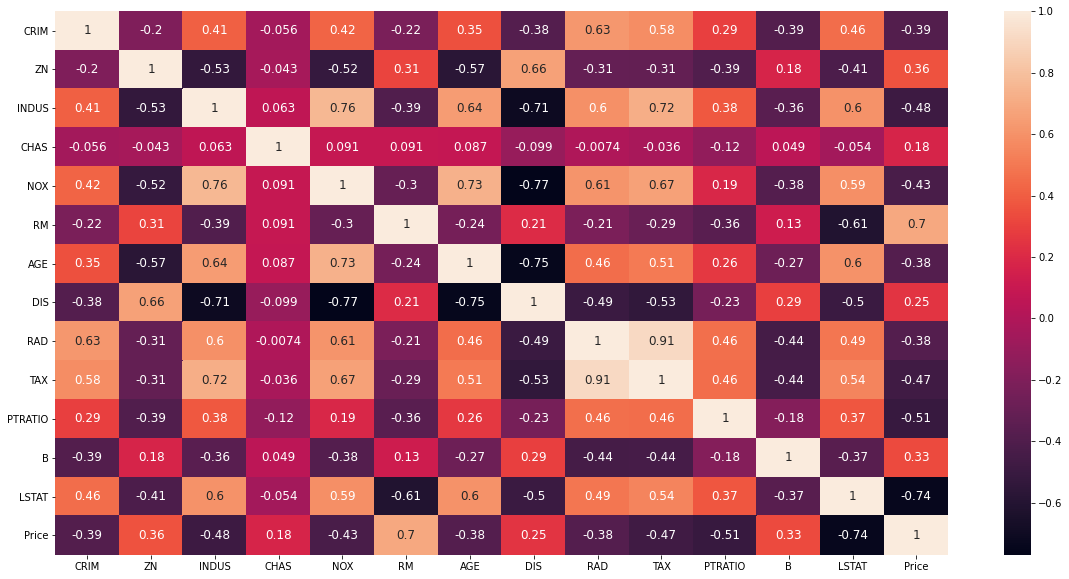

In [24]:
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_mat,annot=True,annot_kws={'size':12})

In [25]:
corr_mat.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [26]:
corr_mat['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [27]:
corr_mat['Price'].index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [28]:
corr_mat['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [29]:
def getcorrfeature(corrdata,threshold):
    feature = []
    values = []
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[i])>threshold:
            feature.append(index)
            values.append(corrdata[i])
    
    ndf = pd.DataFrame(data=values,index=feature,columns=['corr values'])
    return ndf
threshold = 0.50
corr_values = getcorrfeature(corr_mat['Price'],threshold)
corr_values


,corr values
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [30]:
corr_values.index

Index(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype='object')

In [31]:
correlated_data = df[corr_values.index]
correlated_data

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


In [32]:
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


## Pairplot and correlation matrix of correlated_data

In [33]:
# sns.pairplot(correlated_data)
# plt.tight_layout()

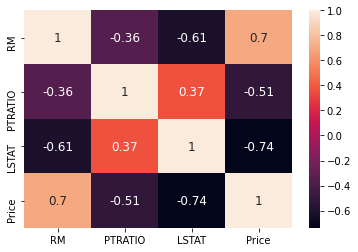

In [34]:
sns.heatmap(correlated_data.corr(),annot=True,annot_kws={'size':12})

## shuffel and split

In [35]:
X = correlated_data.drop(labels=['Price'],axis=1)
y = correlated_data['Price']
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=0)

In [37]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Train the model

In [38]:
y_predict = model.predict(X_test)
y_predict

array([27.68693946, 22.16143786, 26.55148357, 12.5562239 , 22.27137282,
       20.31320021, 19.75222083, 21.2870873 , 17.27621389, 21.48990611,
       14.54516079, 17.05884622, 17.79137964,  4.67015975, 39.41103425,
       34.51224027, 21.55277793, 38.41144887, 30.08884441, 22.24778488,
       25.08125065, 25.55967817, 18.30565848, 27.59034397, 22.18615694,
       10.27367885, 17.68183826, 22.63655332, 35.39990873, 19.91328441,
       17.01029461, 18.55241469, 23.08649292, 24.06193759, 27.36327532,
       17.44874267, 11.03299258, 21.14834908, 17.90872382, 13.32823872,
       27.13307349, 20.28348256, 25.87811355, 13.83928607, 28.89769833,
       25.96042635, 21.46099075, 24.75356938, 11.35439701, 23.52453532,
       24.90692173, 16.29104335, 23.12862768, 35.32392987, 14.54523045,
       22.85298038, 22.10917657, 20.59403035, 19.93781144, 18.35651993,
       23.98952721, 21.89429601, 32.72163681, 30.13192758, 17.0090288 ,
       32.17654785, 19.11349443, 22.05093124, 18.7090253 , 21.85

In [39]:
y_predict.shape,y_test.shape


((203,), (203,))

In [40]:
k = pd.DataFrame([y_predict,y_test])
k.T

,0,1
0,27.686939,22.6
1,22.161438,50.0
2,26.551484,23.0
3,12.556224,8.3
4,22.271373,21.2
...,...,...
198,25.920915,22.1
199,37.896068,46.0
200,26.170984,22.9
201,16.861049,20.2


## Defining Performance Matrics

In [41]:
from sklearn.metrics import r2_score

In [42]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print('r2_score :' , score)
print('mean_absolute_error :', mae)
print('mean_square_error :', mse)


r2_score : 0.6264927804016713
mean_absolute_error : 3.9774184613683294
mean_square_error : 30.90045720828859


In [43]:
correlated_data

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


## threshold value is 0.60 (taking features values>0.60)

In [44]:
correlated_data.columns.values

array(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [45]:
col =correlated_data.columns
col[1]

'PTRATIO'

In [46]:
corr_mat['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [47]:
threshold=0.60
corr_value = getcorrfeature(corr_mat['Price'],threshold)
corr_value.index

Index(['RM', 'LSTAT', 'Price'], dtype='object')

In [48]:
correlated_data = df[corr_value.index]
correlated_data.head()

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [49]:
x1 = correlated_data.drop(labels=['Price'],axis=1)
y1 = correlated_data['Price']
x1_test,x1_train,y1_test,y1_train = train_test_split(x1,y1,test_size=0.40,random_state=0)
model = LinearRegression()
model.fit(x1_train,y1_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y1_predict = model.predict(x1_test)
y1_predict

array([31.5346402 , 12.46371809, 25.11867064, 20.75521417, 27.71742382,
       23.92401282, 20.62293544, 28.10733668, 26.28153179, 20.18507524,
       21.29222695, 21.66786388, 16.07860722, 14.91611134, 28.23023315,
       20.48814325, 32.62911808, 11.88863263, 16.50465738, 19.69472622,
       16.53283617, 22.37573521, 22.7362558 , 13.37258718, 23.68950026,
       27.40512932, 21.23784617, 16.9786774 , 25.30574216, 22.63112851,
       31.70052802, 22.30044252, 23.64550574, 18.99338182, 19.22840847,
       30.26657304, 18.34149421, 40.48660387, 27.59437157, 25.18723305,
       18.07851548, 30.71293615, 28.46429475, 23.70311493,  9.9968628 ,
       29.78065032, 16.81836786,  0.34549177, 20.04486056, 15.88192836,
       39.80695808, 18.56734807, 15.8933022 , 30.1456993 , 23.23675822,
       19.70488659, 31.17122531, 25.96213479, 25.94292626, 17.50663423,
       25.41121218, 22.42232804, 13.41099563, 25.02959192, 11.15455317,
       22.34316905, 18.02173891, 26.24975152, 18.41505933, 15.71

In [51]:
score = r2_score(y1_test,y1_predict)
mae = mean_absolute_error(y1_test,y1_predict)
mse = mean_squared_error(y1_test,y1_predict)

print('r2_score:',score)
print('mae:',mae)
print('mse:',mse)

r2_score: 0.6443776125540868
mae: 3.910031759816718
mse: 30.38340716824278


In [52]:
corr_values = getcorrfeature(corr_mat['Price'],0.70)
corr_values

,corr values
LSTAT,-0.737663
Price,1.000000


In [53]:
correlated_data1 = df[corr_values.index]
correlated_data1

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [54]:
x2 = correlated_data1.drop(labels=['Price'],axis=1)
y2= correlated_data1['Price']
x2_test,x2_train,y2_test,y2_train = train_test_split(x1,y1,test_size=0.40,random_state=0)
model = LinearRegression()
model.fit(x2_train,y2_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
x2

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [56]:
y2

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [57]:
y2_predict = model.predict(x2_test)
y2_predict


array([31.5346402 , 12.46371809, 25.11867064, 20.75521417, 27.71742382,
       23.92401282, 20.62293544, 28.10733668, 26.28153179, 20.18507524,
       21.29222695, 21.66786388, 16.07860722, 14.91611134, 28.23023315,
       20.48814325, 32.62911808, 11.88863263, 16.50465738, 19.69472622,
       16.53283617, 22.37573521, 22.7362558 , 13.37258718, 23.68950026,
       27.40512932, 21.23784617, 16.9786774 , 25.30574216, 22.63112851,
       31.70052802, 22.30044252, 23.64550574, 18.99338182, 19.22840847,
       30.26657304, 18.34149421, 40.48660387, 27.59437157, 25.18723305,
       18.07851548, 30.71293615, 28.46429475, 23.70311493,  9.9968628 ,
       29.78065032, 16.81836786,  0.34549177, 20.04486056, 15.88192836,
       39.80695808, 18.56734807, 15.8933022 , 30.1456993 , 23.23675822,
       19.70488659, 31.17122531, 25.96213479, 25.94292626, 17.50663423,
       25.41121218, 22.42232804, 13.41099563, 25.02959192, 11.15455317,
       22.34316905, 18.02173891, 26.24975152, 18.41505933, 15.71

In [58]:
score = r2_score(y2_test,y2_predict)
mae = mean_absolute_error(y2_test,y2_predict)
mse = mean_squared_error(y2_test,y2_predict)

print('r2_score:',score)
print('mae:',mae)
print('mse:',mse)

r2_score: 0.6443776125540868
mae: 3.910031759816718
mse: 30.38340716824278


## Lets Create a performance matrix to store performance, generate due to change in train test data size

In [59]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

def performance_metrics(features, th, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_dataframe = pd.DataFrame(data= [total_features_name, total_features, selected_correlation_value, r2_scores, mae_value, mse_value],
                                    index = ['features name', '#feature', 'corr_value', 'r2_score', 'MAE', 'MSE'])
    return metrics_dataframe.T

In [60]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'LSTAT' 'Price'],2,0.6,0.626493,3.97742,30.9005


### Regression plot of the features correlated with the House Price

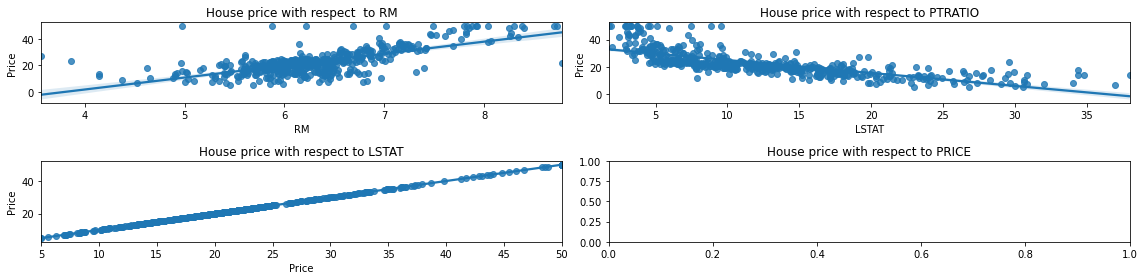

In [64]:
rows = 2
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (16, 4))
ax[0, 0].set_title("House price with respect  to RM")
ax[0, 1].set_title("House price with respect to PTRATIO")
ax[1, 0].set_title("House price with respect to LSTAT")
ax[1, 1].set_title("House price with respect to PRICE")
col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['Price'], ax = ax[i][j])
        index = index+1
        if index==3:
            break
fig.tight_layout()

In [65]:
from sklearn.model_selection import learning_curve, ShuffleSplit

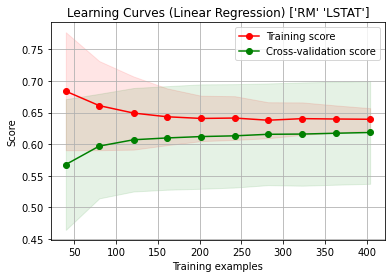

In [66]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X = correlated_data.drop(labels = ['Price'], axis = 1)
y = correlated_data['Price']

title = "Learning Curves (Linear Regression) " + str(X.columns.values)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()